In [1]:
# import base
import tensorflow as tf
import os

2022-11-18 15:14:46.797973: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("python version: ", sys.version)
print("tf version: ", tf.__version__)
print("devices: ", tf.config.list_physical_devices())

python version:  3.9.13 (main, Oct 13 2022, 16:12:30) 
[Clang 12.0.0 ]
tf version:  2.10.0
devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# load model
from tensorflow.keras.models import load_model
import pandas as pd
from tensorflow_hub import KerasLayer
import pandas as pd

model = load_model('model.h5')

2022-11-18 15:14:52.260304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 15:14:52.260848: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-18 15:14:52.260892: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 15:14:52.261099: I tensorflow/core/

Metal device set to: AMD Radeon Pro 560X

systemMemory: 32.00 GB
maxCacheSize: 2.00 GB



In [4]:
# pipeline datasets
# create train and validation datasets
batch_size = 128
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./data/images/",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "./data/images/",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

Found 16041 files belonging to 2 classes.
Using 12833 files for training.
Found 16041 files belonging to 2 classes.
Using 3208 files for validation.


In [5]:
# get classes
train_ds.class_names

['car', 'not_car']

In [6]:
# configure for performance
autotune = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=autotune)
val_ds = val_ds.cache().prefetch(buffer_size=autotune)

In [13]:
# train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
101/101 [==============================] - 53s 522ms/step - loss: 1.8073e-04 - accuracy: 1.0000 - val_loss: 0.2946 - val_accuracy: 0.9520
Epoch 2/10
101/101 [==============================] - 52s 520ms/step - loss: 1.3446e-04 - accuracy: 1.0000 - val_loss: 0.3004 - val_accuracy: 0.9520
Epoch 3/10
101/101 [==============================] - 52s 520ms/step - loss: 1.0713e-04 - accuracy: 1.0000 - val_loss: 0.3041 - val_accuracy: 0.9532
Epoch 4/10
101/101 [==============================] - 53s 520ms/step - loss: 8.8526e-05 - accuracy: 1.0000 - val_loss: 0.3086 - val_accuracy: 0.9523
Epoch 5/10
101/101 [==============================] - 52s 520ms/step - loss: 7.5712e-05 - accuracy: 1.0000 - val_loss: 0.3117 - val_accuracy: 0.9536
Epoch 6/10
101/101 [==============================] - 53s 521ms/step - loss: 6.5846e-05 - accuracy: 1.0000 - val_loss: 0.3154 - val_accuracy: 0.9536
Epoch 7/10
101/101 [==============================] - 52s 520ms/step - loss: 5.8078e-05 - accuracy: 1.0000

In [22]:
# save model
import pandas as pd

model.save('model.h5')
hist_df = pd.DataFrame(history.history)
with open("hist.json", "w") as f:
    hist_df.to_json(f)

import tensorflowjs as tfjs
# save to tensorflowjs
tfjs.converters.save_keras_model(model, "model_tfjs.json")


  Referenced from: '/Users/tejas/miniconda3/envs/ai/lib/python3.9/site-packages/tensorflow_decision_forests/tensorflow/ops/training/training.so'
  Expected in: '/Users/tejas/miniconda3/envs/ai/lib/python3.9/site-packages/tensorflow/libtensorflow_framework.2.dylib'


NotFoundError: dlopen(/Users/tejas/miniconda3/envs/ai/lib/python3.9/site-packages/tensorflow_decision_forests/tensorflow/ops/training/training.so, 0x0006): Symbol not found: (__ZN10tensorflow7ExampleC1Ev)
  Referenced from: '/Users/tejas/miniconda3/envs/ai/lib/python3.9/site-packages/tensorflow_decision_forests/tensorflow/ops/training/training.so'
  Expected in: '/Users/tejas/miniconda3/envs/ai/lib/python3.9/site-packages/tensorflow/libtensorflow_framework.2.dylib'

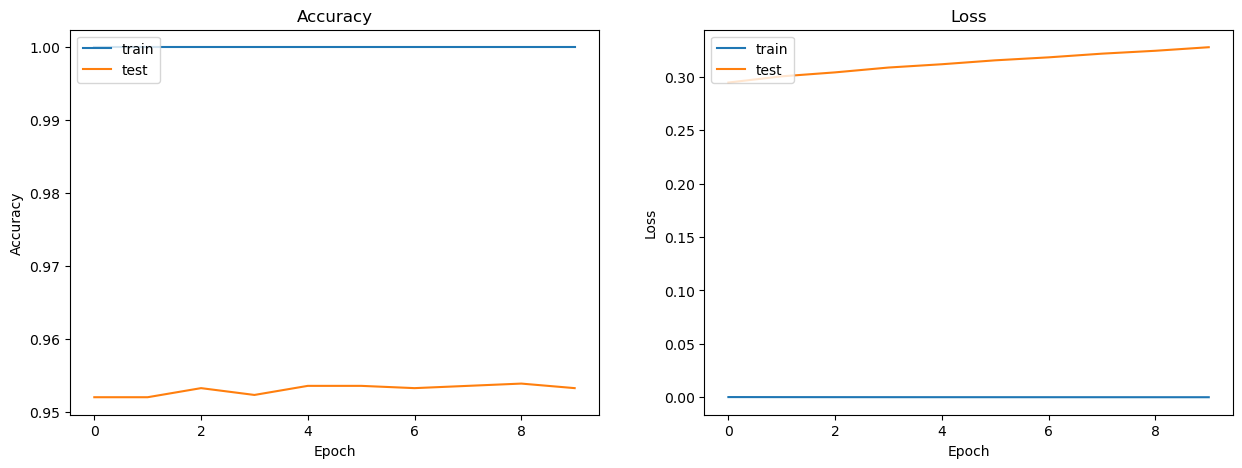

In [20]:
# visualize model
#plot accuracy and val_accuracy
import matplotlib.pyplot as plt
import pandas as pd

model_hist = pd.read_json("hist.json")
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].set_title("Accuracy")
axes[0].plot(model_hist['accuracy'], label='train')
axes[0].plot(model_hist['val_accuracy'], label = 'test')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='upper left')
# plot loss and val_loss
axes[1].set_title("Loss")
axes[1].plot(model_hist['loss'], label='train')
axes[1].plot(model_hist['val_loss'], label = 'test')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')

plt.show()